In [101]:
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report
import tensorflow as tf
# Import seaborn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

>By the past we've talked about seaborn ,pandas and so one ,today lets talks about sklearn
particularly sklearn.metrics

>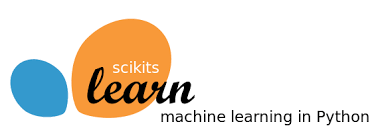
Scikit-learn (Sklearn) is the most useful and robust library for machine learning in Python.  
Sklearn cointains models for differents task that we've mentioned before (classification,unsupervised learning and...)

>In the field of machine learning and specifically the problem of statistical classification, a confusion matrix, also known as an error matrix, is a specific table layout that allows visualization of the performance of an algorithm, typically a supervised learning one (in unsupervised learning it is usually called a matching matrix). 

>suppose that you have dataset for cancer prediction  1 person have cancer 0  this person don't have cancer

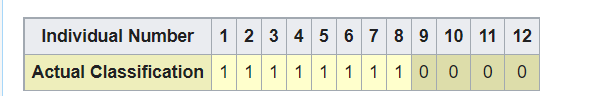   


In [64]:
inumber=[1,2,3,4,5,6,7,8,9,10,11,12]
data = pd.DataFrame(np.transpose(np.array([[1,2,3,4,5,6,7,8,9,10,11,12],[1,1,1,1, 1,1,1,1,0,0,0,0], [0,0,1,1, 1,1,1,1,1,0,0,0],['FN','FN','TP','TP','TP','TP','TP','TP','FP','TN','TN','TN']])),
                   columns=['inumber','actualvalues','predictedvalues','result'],index=inumber)


In [65]:
data

,inumber,actualvalues,predictedvalues,result
1,1,1,0,FN
2,2,1,0,FN
3,3,1,1,TP
4,4,1,1,TP
5,5,1,1,TP
6,6,1,1,TP
7,7,1,1,TP
8,8,1,1,TP
9,9,0,1,FP
10,10,0,0,TN


>here we have created our model ,we can see now our model prediction

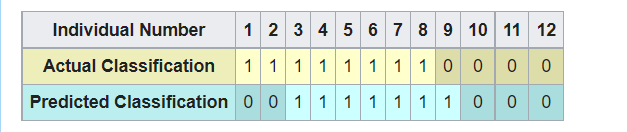

In [13]:
data[0:3]

,0,1,2,3,4,5,6,7,8,9,10,11
0,1,2,3,4,5,6,7,8,9,10,11,12
1,1,1,1,1,1,1,1,1,0,0,0,0
2,0,0,1,1,1,1,1,1,1,0,0,0


>let evaluate now our model

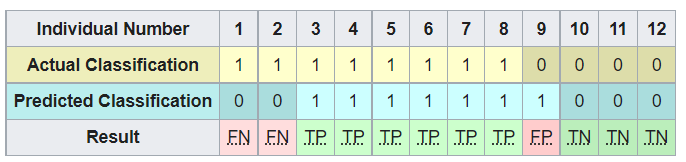

In [14]:
data[0:4]

,0,1,2,3,4,5,6,7,8,9,10,11
0,1,2,3,4,5,6,7,8,9,10,11,12
1,1,1,1,1,1,1,1,1,0,0,0,0
2,0,0,1,1,1,1,1,1,1,0,0,0
3,FN,FN,TP,TP,TP,TP,TP,TP,FP,TN,TN,TN


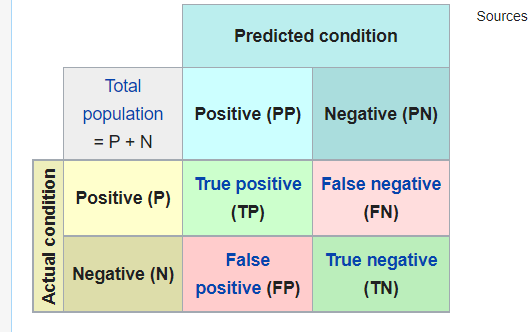

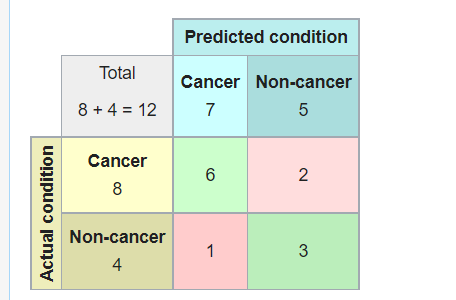

>It gives you insight not only into the errors being made by your classifier but more importantly the types of errors that are being made.

In [77]:
## I will show and example here but i will show a specific example related to the image later
import numpy as np
testLabel=[int(i) for i in data['actualvalues']]
PredLabelsA=[int(i) for i in data['predictedvalues']]

In [78]:
testLabel


[1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0]

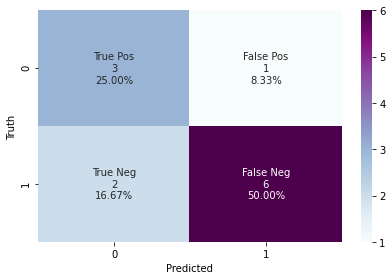

In [100]:
from sklearn.metrics import confusion_matrix
n_conf_mat = confusion_matrix(testLabel, PredLabelsA)

group_names = ['True Pos','False Pos','True Neg','False Neg']


#count variable
group_counts = ['{0:0.0f}'.format(value) for value in
                n_conf_mat.flatten()]

#percentage of each target
group_percentages = ['{0:.2%}'.format(value) for value in
                     n_conf_mat.flatten()/np.sum(n_conf_mat)]

labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax=sns.heatmap(n_conf_mat, annot=labels, cmap='BuPu', fmt='')

ax.set_xlabel('Predicted')
ax.set_ylabel('Truth')
plt.tight_layout()
#plt.savefig("confusion_matrix_model_opti_lr0_007.png",dpi=300)

>definition of TP,TN,FP,FN

>“true positive” for correctly predicted event values.(persons who don't have cancer)    
“false positive” for incorrectly predicted event values.  
“true negative” for correctly predicted no-event values.( persons who have cancer)    
“false negative” for incorrectly predicted no-event values.  

In [ ]:
##classification report

In [102]:
target_names = ['no cancer', 'cancer']
>>> print(classification_report(testLabel, PredLabelsA, target_names=target_names))

              precision    recall  f1-score   support

   no cancer       0.60      0.75      0.67         4
      cancer       0.86      0.75      0.80         8

    accuracy                           0.75        12
   macro avg       0.73      0.75      0.73        12
weighted avg       0.77      0.75      0.76        12



#### precison

>Precision can be seen as a measure of a classifier’s exactness. For each class, it is defined as the ratio of true positives to the sum of true and false positives. Said another way, “for all instances classified positive, what percent was correct?”

#### recall

>Recall is a measure of the classifier’s completeness; the ability of a classifier to correctly find all positive instances. For each class, it is defined as the ratio of true positives to the sum of true positives and false negatives. Said another way, “for all instances that were actually positive, what percent was classified correctly?”

In [104]:
####f1 score

#### support


>Support is the number of actual occurrences of the class in the specified dataset. Imbalanced support in the training data may indicate structural weaknesses in the reported scores of the classifier and could indicate the need for stratified sampling or rebalancing. Support doesn’t change between models but instead diagnoses the evaluation process.

https://www.scikit-yb.org/en/latest/api/classifier/classification_report.html